In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

In [2]:
square = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])


In [3]:
def apply_transform(shape, matrix):
    ones = np.ones((shape.shape[0], 1))
    homogeneous = np.hstack((shape, ones))
    transformed = (matrix @ homogeneous.T).T[:, :2]
    return transformed

def get_translation_matrix(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def get_rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

def get_scale_matrix(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])


In [4]:
os.makedirs("python/frames", exist_ok=True)
frames = []

for t in range(60):
    theta = t * np.pi / 30
    tx = np.sin(t * 0.1)
    ty = np.cos(t * 0.1)
    s = 1 + 0.5 * np.sin(t * 0.1)

    T = get_translation_matrix(tx, ty)
    R = get_rotation_matrix(theta)
    S = get_scale_matrix(s, s)
    combined = T @ R @ S
    transformed = apply_transform(square, combined)

    fig, ax = plt.subplots()
    ax.plot(transformed[:, 0], transformed[:, 1], marker='o', color='tomato')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal')
    ax.grid(True)

    filename = f"python/frames/frame_{t:03d}.png"
    fig.savefig(filename)
    plt.close(fig)

    frames.append(imageio.imread(filename))


In [5]:
os.makedirs("python/resultados", exist_ok=True)

imageio.mimsave("python/resultados/transformaciones_cuadrado.gif", frames, duration=0.1)
print("✅ GIF guardado como python/resultados/transformaciones_cuadrado.gif")


✅ GIF guardado como python/resultados/transformaciones_cuadrado.gif


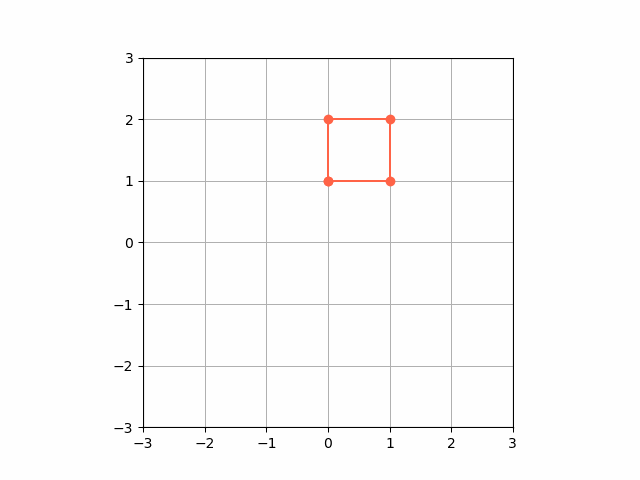

In [7]:
from IPython.display import Image
Image(filename="python/resultados/transformaciones_cuadrado.gif")
